# **DL** case study on '***Northeastern SMILE Lab - Recognizing Faces in the Wild***'

#### **Description**

1.This data is provided by Families In the Wild (FIW), the largest and most comprehensive image database for automatic kinship recognition.

2.FIW's dataset is obtained from publicly available images from celebrities. 

#### **Problem statement:** 

1.Given image pairs more specifically human faces the task is to determine whether two images has blood relation or not or putting simply does both images comes from same family or not.

2.Relations may be of Father-Daughter,Father -Son,Mother-Daughter/Son ,Grandfather-Grandson and sometimes silbings relationships etc.

Note :There is no blood relationship between Husband and Wife even though they belongs to same family.

3.If related label is 1 else 0.

#### **Evalution mertric**

The chosen metric is AUC-ROC between the predicted and observed labels.

#### **Dataset ,input and outputs**

1.train-faces.zip - the training set is divided in Families (F0123), then individuals (MIDx). Images in the same MIDx folder belong to the same person. Images in the same F0123 folder belong to the same family.

2.train.csv - training labels. Remember, not every individual in a family shares a kinship relationship. For example, a mother and father are kin to their children, but not to each other.

3.test-faces.zip - the test set contains face images of unknown individuals
sample_submission.csv - a sample submission file in the correct format. The column img_pair describes the pair of images, i.e., abcdef-ghijkl means the pair of images abcdef.jpg and ghijkl.jpg.

In [2]:
!wget --header="Host: storage.googleapis.com" --header="User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/79.0.3945.88 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9" --header="Accept-Language: en-US,en;q=0.9" --header="Referer: https://www.kaggle.com/" "https://storage.googleapis.com/kaggle-competitions-data/kaggle-v2/9992/443277/bundle/archive.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1578896465&Signature=r%2BIAw4%2BCczjD3%2F22Zr9YsAqcvuLwFfDc%2BeedTvicAvVdfDEUJHAgw3bUsZpLdAZaCV7rZ4392Lonf%2BS0z1tTh9qFJGondwBA%2B0Furu20YxBEP0NvhgsKamCv%2BqnDENf%2BQ6TDUV9ruiS0GLWuY5cld29ao5%2Bbo2LR3CIvQVr2%2Fec0yY%2Fm%2F4JXUJKD8c9ly0hBp2f8OrE1wiRtT3ySNgt%2Bzg25%2BPD%2FpuL%2FNFRRzUxGPRBVGIZVnUcRQcLXFN1Bk4yQ%2B%2BDHa88ueBE4t20mkXp2lfTFeqw6ObLHPurbSeEA46kVsJ97tzpFzBa9IzVtCi7NAeir1%2BMawLUxI4dD9OEgUA%3D%3D&response-content-disposition=attachment%3B+filename%3Drecognizing-faces-in-the-wild.zip" -O "recognizing-faces-in-the-wild.zip" -c

--2020-01-12 08:33:51--  https://storage.googleapis.com/kaggle-competitions-data/kaggle-v2/9992/443277/bundle/archive.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1578896465&Signature=r%2BIAw4%2BCczjD3%2F22Zr9YsAqcvuLwFfDc%2BeedTvicAvVdfDEUJHAgw3bUsZpLdAZaCV7rZ4392Lonf%2BS0z1tTh9qFJGondwBA%2B0Furu20YxBEP0NvhgsKamCv%2BqnDENf%2BQ6TDUV9ruiS0GLWuY5cld29ao5%2Bbo2LR3CIvQVr2%2Fec0yY%2Fm%2F4JXUJKD8c9ly0hBp2f8OrE1wiRtT3ySNgt%2Bzg25%2BPD%2FpuL%2FNFRRzUxGPRBVGIZVnUcRQcLXFN1Bk4yQ%2B%2BDHa88ueBE4t20mkXp2lfTFeqw6ObLHPurbSeEA46kVsJ97tzpFzBa9IzVtCi7NAeir1%2BMawLUxI4dD9OEgUA%3D%3D&response-content-disposition=attachment%3B+filename%3Drecognizing-faces-in-the-wild.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.188.128, 2404:6800:4008:c05::80
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.188.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 399768285 (381M) [application/zip]
Saving to: ‘recognizing-fa

In [3]:
import tensorflow as tf
import zipfile
with zipfile.ZipFile('recognizing-faces-in-the-wild.zip', 'r') as zip_ref:
    zip_ref.extractall('recognizing-faces-in-the-wild')
    
with zipfile.ZipFile('recognizing-faces-in-the-wild/train.zip', 'r') as zip_ref:
    zip_ref.extractall('train')
with zipfile.ZipFile('recognizing-faces-in-the-wild/test.zip', 'r') as zip_ref:
    zip_ref.extractall('test')

In [4]:
!pip install git+https://github.com/rcmalli/keras-vggface.git

  Cloning https://github.com/rcmalli/keras-vggface.git to /tmp/pip-req-build-n7cy7e20
  Running command git clone -q https://github.com/rcmalli/keras-vggface.git /tmp/pip-req-build-n7cy7e20
  Created wheel for keras-vggface: filename=keras_vggface-0.6-cp36-none-any.whl size=8311 sha256=72e82e4eb256ee9bb0843e70e9bcc3aa076034cee7c77ee85e89dd8a628cb1ad
  Stored in directory: /tmp/pip-ephem-wheel-cache-iemp05ho/wheels/36/07/46/06c25ce8e9cd396dabe151ea1d8a2bc28dafcb11321c1f3a6d
Successfully built keras-vggface


In [0]:
from collections import defaultdict
from glob import glob
from random import choice,sample
from PIL import Image
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tqdm import tqdm
import h5py
from keras.callbacks import ModelCheckpoint
from keras import backend as K
from keras.models import load_model
from keras.layers import Input,Dense,GlobalMaxPool2D,GlobalAvgPool2D,Concatenate,Multiply,Dropout,Subtract,Lambda,Flatten,Add,Conv2D,Conv1D
from keras.models import Model
from keras.optimizers import Adam
from keras_vggface.utils import preprocess_input
from keras_vggface.vggface import VGGFace
import tensorflow as tf
from sklearn.metrics import roc_auc_score
import os
import statistics


# Reading neccessery files

In [6]:
# Reading all neccessary files required
train_file_path='recognizing-faces-in-the-wild/train_relationships.csv'
train_folders_path='train/'
train_csv=pd.read_csv(train_file_path)
train_csv.head()

,p1,p2
0,F0002/MID1,F0002/MID3
1,F0002/MID2,F0002/MID3
2,F0005/MID1,F0005/MID2
3,F0005/MID3,F0005/MID2
4,F0009/MID1,F0009/MID4


# EDA

#### Listing all families in train folder

In [7]:
family=list(os.listdir(train_folders_path))
print('count of families:',len(family))
print('Different families:',np.array(family))

count of families: 470
Different families: ['F0106' 'F0394' 'F0390' 'F0515' 'F0020' 'F0774' 'F0801' 'F0655' 'F0170'
 'F0593' 'F0086' 'F0687' 'F0820' 'F0970' 'F0538' 'F0812' 'F0816' 'F0973'
 'F0874' 'F0746' 'F0231' 'F0955' 'F0997' 'F0238' 'F0969' 'F0017' 'F0947'
 'F0264' 'F0893' 'F0059' 'F0679' 'F0446' 'F0334' 'F0298' 'F0959' 'F0854'
 'F0179' 'F0266' 'F0271' 'F0214' 'F0044' 'F0677' 'F0748' 'F0344' 'F0360'
 'F0363' 'F0341' 'F0456' 'F0361' 'F0155' 'F0596' 'F0977' 'F0118' 'F0794'
 'F0077' 'F0771' 'F0892' 'F0967' 'F0769' 'F0196' 'F0536' 'F0768' 'F0658'
 'F0688' 'F0091' 'F0985' 'F0765' 'F0168' 'F0664' 'F0373' 'F0574' 'F0903'
 'F0721' 'F0277' 'F0944' 'F0425' 'F0533' 'F0183' 'F0960' 'F0625' 'F0236'
 'F0739' 'F0610' 'F0539' 'F0157' 'F0780' 'F0326' 'F0503' 'F0784' 'F0978'
 'F0972' 'F0192' 'F0161' 'F0228' 'F0357' 'F0718' 'F0773' 'F0500' 'F0696'
 'F0517' 'F0049' 'F0365' 'F0303' 'F0998' 'F0491' 'F0369' 'F0933' 'F0703'
 'F0165' 'F0813' 'F0093' 'F0465' 'F0336' 'F0410' 'F0253' 'F0565' 'F0785'
 'F0403'

In [8]:
print ('example of member ID in family ID f0242:',os.listdir('train/F0242'))

example of member ID in family ID f0242: ['MID1', 'MID3', 'MID2', 'MID5']


#### Visualizing the images in based on relationship given

In [9]:
# Fetching images by their corresponding familes and storing in dictornary
count=0
height=[]
width=[]
allPhotos = defaultdict(list)
for family in glob("train/*"):
    for mem in glob(family + '/*'):
        for photo in glob(mem + '/*'):
            allPhotos[mem].append(photo)
            img = cv2.imread(photo)
            h, w = img.shape[:2] # gathering resolution images and append it to lists
            height.append(h )
            width.append(w)
            count+=1

images = list(allPhotos.keys())

print('Number of images in train folder:',count)
print('resolution of single image:',(h,w))
print(' Mean resolution of all images in train',(statistics.mean(height),statistics.mean(width)))


Number of images in train folder: 12379
resolution of single image: (224, 224)
 Mean resolution of all images in train (224, 224)


### Observation:

1. Each image in train folder has same resolution.


In [10]:
train_csv['p1_path'] = train_csv.p1.apply(lambda x: 'train/' + x)
train_csv['p2_path'] = train_csv.p2.apply(lambda x: 'train/' + x)
print(train_csv.shape)

train_csv = train_csv[((train_csv.p1_path.isin(images)) & (train_csv.p2_path.isin(images)))]


(3598, 4)


In [0]:
def image_formatter(im):
    """ returns an iamge based on input provide in the format below"""
    return f'<img src="data:image/jpeg;base64,{image_base64(im)}">'

def add_image_path(x,path):
    """Function that returns the image path from it's code """
    image_path = path + x
    if os.path.exists(image_path):
        path = os.path.join(image_path, os.listdir(image_path)[0])
        return path
def get_thumbnail(path):
    """ return image path with specified resolution"""
    if path and os.path.exists(path):
        i = Image.open(path)
        i.thumbnail((100, 100), Image.LANCZOS)
        return i

def image_base64(im):
    """Function that returns the image format base64"""
    if isinstance(im, str):
        im = get_thumbnail(im)
    with BytesIO() as buffer:
        im.save(buffer, 'jpeg')
        return base64.b64encode(buffer.getvalue()).decode()

In [0]:
# Creating csv for visualization only
train_csv1 =pd.DataFrame(train_csv)
train_csv1['p1_path'] = train_csv.p1.apply(lambda f: add_image_path(f, 'train/')) # fetching 1st image path
train_csv1['p2_path'] = train_csv1.p2.apply(lambda f: add_image_path(f, 'train/'))# fetching 2nd image path
train_csv1['p1_thumb'] = train_csv1.p1_path.map(lambda f: get_thumbnail(f)) 
train_csv1['p2_thumb'] = train_csv1.p2_path.map(lambda f: get_thumbnail(f))


,p1,p2,p1_thumb,p2_thumb
3593,F1000/MID5,F1000/MID8,,
3594,F1000/MID5,F1000/MID9,,
3595,F1000/MID6,F1000/MID9,,
3596,F1000/MID7,F1000/MID8,,
3597,F1000/MID7,F1000/MID9,,

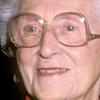
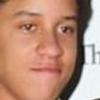
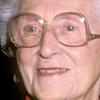
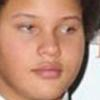
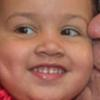
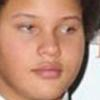
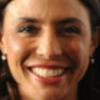
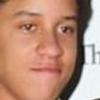
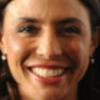
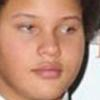

In [13]:
from IPython.display import HTML
from io import BytesIO
import base64
HTML(train_csv1.tail()[['p1', 'p2', 'p1_thumb', 'p2_thumb']].to_html(formatters={'p1_thumb': image_formatter, 'p2_thumb': image_formatter}, escape=False))

In [14]:
import os
os.listdir()

['.config',
 'recognizing-faces-in-the-wild',
 'test',
 'train',
 'recognizing-faces-in-the-wild.zip',
 'sample_data']

# Data preparation and data modelling

In [0]:
# Fuction for reading images using opencv

def img2arr(path):
    img=cv2.imread(format(path))
    img=np.array(img).astype(np.float)
    return preprocess_input(img,version=2)
# AUC
def auroc(y_true, y_pred):
    return tf.py_func(roc_auc_score, (y_true, y_pred), tf.double)

In [0]:
val_families='F09' # Considering this family id's for validation

all_images=glob(train_folders_path+'*/*/*.jpg') #paths of all images

train_images=[x for x in all_images if val_families not in x] #path of images used for training  other then family idf09

val_images=[x for x in all_images if val_families in x] # image paths for validation



In [0]:
# It stores families as keys and member id with images as values
train_person_to_images_map=defaultdict(list) #  for train
for x in train_images:
    train_person_to_images_map[x.split('/')[-3]+'/'+x.split("/")[-2]].append(x)

val_person_to_images_map=defaultdict(list)#for validation
for x in val_images:
    val_person_to_images_map[x.split('/')[-3]+'/'+x.split('/')[-2]].append(x)

#### Creating list of tuples (blood relative pairs ) for training and validation

In [18]:
relationships = train_csv
ppl=[x.split('/')[-3]+'/'+x.split("/")[-2] for x in all_images]

relationships= list(zip(relationships.p1.values, relationships.p2.values))

relationships = [x for x in relationships if x[0] in ppl and x[1] in ppl]

ppl=[x.split('/')[-3]+'/'+x.split("/")[-2] for x in all_images]

#Diving the tuples into train and validation

train=[x for x in relationships if val_families not in x[0]]# list of tuples contains pairs of BLOOD RELATIVES for training
print('train:list of tuples which contains blood related pairs: ',train[0:5])
val=[x for x in relationships if val_families in x[0]]#list of tuples contains pairs of BLOOD RELATIVES for validation
print('val:list of tuples which contains blood related pairs: ',val[0:5])

train:list of tuples which contains blood related pairs:  [('F0002/MID1', 'F0002/MID3'), ('F0002/MID2', 'F0002/MID3'), ('F0005/MID1', 'F0005/MID2'), ('F0005/MID3', 'F0005/MID2'), ('F0009/MID1', 'F0009/MID4')]
val:list of tuples which contains blood related pairs:  [('F0900/MID2', 'F0900/MID1'), ('F0900/MID3', 'F0900/MID1'), ('F0901/MID1', 'F0901/MID4'), ('F0901/MID2', 'F0901/MID1'), ('F0901/MID2', 'F0901/MID4')]


In [19]:
# just swapped members 
train_swapped = [(sub[1], sub[0]) for sub in train] 
val_swapped = [(sub[1], sub[0]) for sub in val]          
# printing result 
print("The swapped tuple list is : " + str(train_swapped[0:5]))

The swapped tuple list is : [('F0002/MID3', 'F0002/MID1'), ('F0002/MID3', 'F0002/MID2'), ('F0005/MID2', 'F0005/MID1'), ('F0005/MID2', 'F0005/MID3'), ('F0009/MID4', 'F0009/MID1')]


#### Creating list of tuples (non blood relative pairs) for training and validation

In [20]:
import itertools
relationships = train_csv  # reading given csv file
relationships.drop(relationships.index[3274:3576], inplace=True)# removing val elements from relationship csv

non_relation=list(itertools.product(relationships.p1.values, relationships.p2.values))# forming every possible combination pairs which contion both blood and non blood relations
non_relation = list(dict.fromkeys(non_relation)) #removing duplicates if any
('NUMBER OF TUPLES CONTAINING ALL POSSIBLE COMBINATION OF PAIRS except validation pairs:',len(non_relation))


('NUMBER OF TUPLES CONTAINING ALL POSSIBLE COMBINATION OF PAIRS except validation pairs:',
 2138402)

In [0]:
# Removing related pairs from non_realtion List 
for  i in train:
    try:
        non_relation.remove(i)  # removing related pairs 
    except   :
        continue
        
#  swap
for  i in train_swapped:
    try:
        non_relation.remove(i)  # removing related pairs 
    except:
        continue



In [22]:

val_relationships=pd.read_csv(train_file_path)[3274:3576]  #indicies [3274:3576] contains  Val families  'F09' 
non_relation_val=list(itertools.product(val_relationships.p1.values, val_relationships.p2.values))# forming every possible combination of pairs 
non_relation_val = list(dict.fromkeys(non_relation_val)) #removing duplicates
for  i in val:
    try:
        non_relation_val.remove(i)  # removing related pairs 
    except:
        continue
len(non_relation_val)
# for swapped
for  i in val_swapped:
    try:
        non_relation_val.remove(i)  # removing related pairs 
    except:
        continue
len(non_relation_val)



21286

In [0]:
# LIST OF TUPLES WHICH INCLUDES IMAGE PATHS FOR ALL POSSIBLE COMBINATION 

# FOR RELATION PAIRS 
a1=[]
for i in train:
    a=list(train_person_to_images_map[i[0]])
    b=list(train_person_to_images_map[i[1]])
    a1.append(list(itertools.product(a,b)))


# FOR NON-RELATION PAIRS 
a2=[]
for i in non_relation:
    a=list(train_person_to_images_map[i[0]])
    b=list(train_person_to_images_map[i[1]])
    a2.append(list(zip(a,b)))


In [0]:
# for validation
a1_val=[]
for i in val:
    a=list(val_person_to_images_map[i[0]])
    b=list(val_person_to_images_map[i[1]])
    a1_val.append(list(zip(a,b)))
a2_val=[]
for i in non_relation_val:
    a=list(val_person_to_images_map[i[0]])
    b=list(val_person_to_images_map[i[1]])
    a2_val.append(list(itertools.product(a,b)))

In [25]:
import itertools
# CREATING FLATTEN LIST OUT OF LISTS OF LISTS

# for label 1
merged = list(itertools.chain(*a1))

# for label 0
merged1 = list(itertools.chain(*a2))


#for val
merged_val = list(itertools.chain(*a1_val))

# for label 0
merged1_val = list(itertools.chain(*a2_val))
len(merged1_val)



515588

## Creating data frame

###  Train Data frame 

In [26]:
frame=pd.DataFrame(merged)
frame['class']=1
frame.drop(frame[frame[0].values==frame[1].values].index, inplace = True) # Removing identical rows if any
frame= frame.sample(frac=1).reset_index(drop=True)# shuffing data in data frame
print(frame.shape)
print('DATA FRAME CONTAINS BLOOD RELATIVE PAIRS OF IMAGE PATHS FOR training')
frame.head()

(157711, 3)
DATA FRAME CONTAINS BLOOD RELATIVE PAIRS OF IMAGE PATHS FOR training


,0,1,class
0,train/F0157/MID2/P01678_face1.jpg,train/F0157/MID3/P01679_face3.jpg,1
1,train/F0601/MID5/P06337_face2.jpg,train/F0601/MID9/P06279_face2.jpg,1
2,train/F0540/MID1/P05668_face2.jpg,train/F0540/MID2/P05665_face1.jpg,1
3,train/F0891/MID2/P09402_face2.jpg,train/F0891/MID3/P09404_face3.jpg,1
4,train/F0425/MID6/P11485_face6.jpg,train/F0425/MID10/P11485_face4.jpg,1


In [27]:
frame1=pd.DataFrame(merged1)
frame1['class']=0
frame1.drop(frame1[frame1[0].values==frame1[1].values].index, inplace = True) 
frame1= frame1.sample(frame.shape[0], replace=False).reset_index(drop=True)

print('DATA FRAME CONTAINS NON-BLOOD RELATIVE PAIRS OF IMAGE PATHS FOR training')
print(frame1.shape)
frame1.head()

DATA FRAME CONTAINS NON-BLOOD RELATIVE PAIRS OF IMAGE PATHS FOR training
(157711, 3)


,0,1,class
0,train/F0203/MID2/P02183_face2.jpg,train/F0421/MID6/P04423_face9.jpg,0
1,train/F0281/MID2/P02990_face2.jpg,train/F0009/MID1/P10577_face3.jpg,0
2,train/F0711/MID3/P07436_face4.jpg,train/F0696/MID1/P07251_face2.jpg,0
3,train/F0686/MID1/P10053_face4.jpg,train/F0198/MID4/P02127_face4.jpg,0
4,train/F0516/MID3/P05437_face2.jpg,train/F0794/MID5/P08366_face2.jpg,0


In [28]:
df_train=pd.concat([frame,frame1])
df_train =df_train.sample(frac=1).reset_index(drop=True)
df_train

,0,1,class
0,train/F0124/MID1/P08623_face1.jpg,train/F0617/MID3/P06473_face1.jpg,0
1,train/F0516/MID3/P05437_face2.jpg,train/F0464/MID3/P04895_face2.jpg,0
2,train/F0811/MID1/P08570_face1.jpg,train/F0168/MID3/P01812_face2.jpg,0
3,train/F0582/MID1/P06117_face3.jpg,train/F0146/MID4/P01571_face5.jpg,0
4,train/F0812/MID1/P08582_face4.jpg,train/F0812/MID3/P08581_face1.jpg,1
...,...,...,...
315417,train/F0601/MID19/P12008_face1.jpg,train/F0601/MID6/P06332_face1.jpg,1
315418,train/F0530/MID1/P05572_face2.jpg,train/F0332/MID6/P03520_face4.jpg,0
315419,train/F0552/MID2/P05791_face2.jpg,train/F0552/MID4/P05791_face5.jpg,1
315420,train/F0198/MID3/P02125_face4.jpg,train/F0365/MID1/P03865_face2.jpg,0


In [29]:
print('In train numbers of label 1 pairs is {} and label 0 pairs {}'.format(frame.shape[0],frame1.shape[0]))

In train numbers of label 1 pairs is 157711 and label 0 pairs 157711


###  Validation Data frame 

In [30]:

frame_val=pd.DataFrame(merged_val)
frame_val['class']=1
frame_val.drop(frame_val[frame_val[0].values==frame_val[1].values].index, inplace = True) 
frame_val= frame_val.sample(frac=1).reset_index(drop=True)# shuffing data in data frame
print('DATA FRAME CONTAINS BLOOD RELATIVE PAIRS OF IMAGE PATHS FOR Validation')
print(frame_val.shape)
frame_val.head()

DATA FRAME CONTAINS BLOOD RELATIVE PAIRS OF IMAGE PATHS FOR Validation
(997, 3)


,0,1,class
0,train/F0914/MID1/P09645_face1.jpg,train/F0914/MID4/P09647_face2.jpg,1
1,train/F0944/MID2/P09954_face1.jpg,train/F0944/MID3/P09953_face3.jpg,1
2,train/F0988/MID1/P10416_face2.jpg,train/F0988/MID4/P10414_face4.jpg,1
3,train/F0944/MID2/P09946_face2.jpg,train/F0944/MID4/P09948_face3.jpg,1
4,train/F0978/MID4/P10303_face4.jpg,train/F0978/MID5/P10306_face2.jpg,1


In [31]:
frame1_val=pd.DataFrame(merged1_val)
frame1_val['class']=0
frame1_val.drop(frame1_val[frame1_val[0].values==frame1_val[1].values].index, inplace = True) # removing rows if image 1 path and image 2 path  are same
frame1_val= frame1_val.sample(frame_val.shape[0], replace=False).reset_index(drop=True)
print('DATA FRAME CONTAINS NON-BLOOD RELATIVE PAIRS OF IMAGE PATHS FOR Validation')
print(frame1_val.shape)
frame1_val.head()

DATA FRAME CONTAINS NON-BLOOD RELATIVE PAIRS OF IMAGE PATHS FOR Validation
(997, 3)


,0,1,class
0,train/F0967/MID1/P10192_face2.jpg,train/F0981/MID2/P10334_face1.jpg,0
1,train/F0930/MID3/P09813_face2.jpg,train/F0903/MID2/P09542_face2.jpg,0
2,train/F0973/MID1/P10249_face1.jpg,train/F0946/MID2/P09974_face1.jpg,0
3,train/F0985/MID2/P10377_face1.jpg,train/F0965/MID6/P10169_face1.jpg,0
4,train/F0903/MID2/P09539_face1.jpg,train/F0988/MID2/P10412_face5.jpg,0


In [32]:
df_cv=pd.concat([frame_val,frame1_val])
df_cv =df_cv.sample(frac=1).reset_index(drop=True)
df_cv 

,0,1,class
0,train/F0955/MID6/P10069_face2.jpg,train/F0955/MID9/P10067_face2.jpg,1
1,train/F0959/MID1/P10104_face1.jpg,train/F0959/MID4/P10108_face3.jpg,1
2,train/F0988/MID3/P10408_face2.jpg,train/F0985/MID4/P10380_face1.jpg,0
3,train/F0994/MID1/P10478_face1.jpg,train/F0994/MID2/P10478_face2.jpg,1
4,train/F0988/MID1/P10417_face2.jpg,train/F0988/MID6/P10408_face6.jpg,1
...,...,...,...
1989,train/F0916/MID1/P09669_face1.jpg,train/F0978/MID2/P10303_face5.jpg,0
1990,train/F0959/MID5/P10103_face4.jpg,train/F0959/MID2/P10104_face3.jpg,1
1991,train/F0984/MID1/P10369_face13.jpg,train/F0984/MID6/P10369_face9.jpg,1
1992,train/F0947/MID2/P09979_face1.jpg,train/F0998/MID1/P10547_face4.jpg,0


In [33]:
print('In valadition numbers of label 1 pairs is {} and label 0 pairs {}'.format(frame_val.shape[0],frame1_val.shape[0]))

In valadition numbers of label 1 pairs is 997 and label 0 pairs 997


#### Observation

1. Data is hugely imbalanced as we can see label 0 pairs are 99.9 percent of whole data and it's known fact that non_blood relative pairs can be formed with any possible combination excluding related pairs

2. We need to somw how balance data while training.

# Data generator

In [0]:
from sklearn.utils import shuffle
def datagenerator(dataframe0,dataframe1, batch_size):
    """ This data generator generates two numpy arrays specified with equal number of label 1 and label 0 pairs"""
    L0 = len(dataframe0)
    L1=len(dataframe1)
    
    """this line is just to make the generator infinite"""
    while True: 

        batch_start = 0
        batch_end = batch_size
        
        batch_start1 = 0
        batch_end1 = batch_size
        while  batch_start1<L1-1:
            
            label=[]
            
            limit = min(batch_end, L0)
           # X1=(dataframe0.sample(batch_size, replace=True)) # using sample to fetch random images paths of label 0 since we have lots label 0 pairs
            #X11=np.array([img2arr(i) for i in X1[0]]) # image 1 label 0
           # X12=np.array([img2arr(i) for i in X1[1]]) # image 2 label 0
           # label.extend([i for i in X1['class']])
    


            X11=np.array([img2arr(i) for i in dataframe0[0][batch_start:limit]])
            X12=np.array([img2arr(i) for i in dataframe0[1][batch_start:limit]])
            label.extend([i for i in dataframe0['class'][batch_start:limit]])
            
  

        
        
            limit = min(batch_end1, L0)
           # if (batch_start1-batch_size+1)==L1:
             #   batch_start1=0
              #  batch_end1 = batch_size
           
           # fetching label 1 pairs sequencing with every iteration
            X21=np.array([img2arr(i) for i in dataframe1[0][batch_start1:limit]])# image 1 label 1
            X22=np.array([img2arr(i) for i in dataframe1[1][batch_start1:limit]])# image 2 label 1
            label.extend([i for i in dataframe1['class'][batch_start1:limit]])
            
           
            c = np.concatenate((X11, X21), axis=0) # concatenating label 0 and label 1 pairs for image 1
            d = np.concatenate((X12, X22), axis=0)  # concatenating label 0 and label 1 pairs for image 2
            c, d ,label= shuffle(c, d,label, random_state=43)
            yield [c,d],label

            batch_start += batch_size   
            batch_end += batch_size
            batch_start1 += batch_size  
            batch_end1 += batch_size
            
            

##### Defining Image Augmentation

In [0]:
import keras.preprocessing
from keras_preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rotation_range=25,width_shift_range=0.2, height_shift_range=0.2,horizontal_flip=True, vertical_flip=True)

In [129]:
image_shape=(224,224)
batch_size=24
train_generator_1 = datagen.flow_from_dataframe(df_train, target_size=image_shape,# used flow from dataframe
                                                    
                                                    x_col=0,
                                                    y_col='class',
                                                    class_mode='raw',
                                                 
                                                    batch_size=batch_size
                                                    )

train_generator_2 =datagen.flow_from_dataframe(df_train, target_size=image_shape,
                                                    
                                                    x_col=1,
                                                    y_col='class',
                                                    class_mode='raw',
                                                   
                                                    batch_size=batch_size
                                                  )


Found 315422 validated image filenames.
Found 315422 validated image filenames.


In [130]:

train_generator_3 = datagen.flow_from_dataframe(df_cv, target_size=image_shape,
                                                    
                                                    x_col=0,
                                                    y_col='class',
                                                    class_mode='raw',
                                                 
                                                    batch_size=batch_size
                                                    )

train_generator_4=datagen.flow_from_dataframe(df_cv, target_size=image_shape,
                                                    
                                                    x_col=1,
                                                    y_col='class',
                                                    class_mode='raw',
                                                   
                                                    batch_size=batch_size
                                                  )


Found 1994 validated image filenames.
Found 1994 validated image filenames.


In [0]:


def get_flow_from_dataframe(a,b):
    train_generator1=a
    train_generator2=b

    while True:
        x_1 = train_generator1.next()
      #  print(x_1)
        x_2 = train_generator2.next()

        yield [x_1[0], x_2[0]], x_1[1]
       

In [0]:
"""
def data_generator(label0_frame,label1_frame,batch_size):
    while True:
    # this generator is same as above but it is random fetching data  by using 'sample'
   
        A=[]
        while len(A)<batch_size:
            
            label=[]
            X1=(label0_frame.sample(batch_size//2, replace=True))
            X2=(label1_frame.sample(batch_size//2, replace=True))
            A.append(X1[0])
        X11=np.array([img2arr(i) for i in X1[0]])# for label 1 imag 1
        X21=np.array([img2arr(i) for i in X2[0]]) # for label 0 image 1
        X12=np.array([img2arr(i) for i in X1[1]])# for label 1 image2
        X22=np.array([img2arr(i) for i in X2[1]])# for label 0
        label.extend([i for i in X1['class']])
        label.extend([i for i in X2['class']])

        c = np.concatenate((X11, X21), axis=0)
        d = np.concatenate((X12, X22), axis=0)
            
            #print(label)

        yield [c,d] ,label
"""

In [40]:
from keras.callbacks import TensorBoard
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

# Load the TensorBoard notebook extension
%load_ext tensorboard

TensorFlow is already loaded. Please restart the runtime to change versions.


# Model 1

## Model 1a

In [0]:
from keras.layers.normalization import BatchNormalization
def model_11():
  input1=Input(shape=(224,224,3))
  input2=Input(shape=(224,224,3))
  

  base_model=VGGFace(model='resnet50',include_top=False)  # Pretrained model  Vggface
  for x in base_model.layers[:-3]:
      x.trainable = True

  x1=base_model(input1)
  x2=base_model(input2)
  x1=Dropout(0.2)(x1)
  x2=Dropout(0.2)(x2)
  x1=Concatenate(axis=-1)([GlobalMaxPool2D()(x1),GlobalAvgPool2D()(x1)])
  x2=Concatenate(axis=-1)([GlobalMaxPool2D()(x2),GlobalAvgPool2D()(x2)])

  x3=Subtract()([x1,x2])
  x3=Multiply()([x3,x3])

  x1_=Multiply()([x1,x1])
  x2_=Multiply()([x2,x2])
  x4=Subtract()([x1_,x2_])

  x5=Multiply()([x1,x2])

  x=Concatenate(axis=-1)([x3,x4,x5])

  x=(BatchNormalization())(x)
  
  x=Dropout(0.2)(x)
 
  x=Dense(256,activation='relu')(x)
  x=(BatchNormalization())(x)
  x=Dropout(0.2)(x)
  out=Dense(1,activation='sigmoid')(x)

  model=Model([input1,input2],out)

  model.compile(loss='binary_crossentropy',metrics=['acc',auroc],optimizer=Adam(0.00001))

  model.summary()

  return model

In [0]:
import warnings
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
model1=model_11()
#model.load_weights('1_model_weights.h5')
file_path='my_model_11.hdf5'
log_dir='model1'
tensorboard_callback = TensorBoard(log_dir=log_dir)
reduce_on_plateau = ReduceLROnPlateau(monitor="val_acc", mode="max", factor=0.1, patience=20, verbose=1)
checkpoint=ModelCheckpoint(file_path,monitor='val_acc',verbose=1,save_best_only=True,mode='max') #Saves the best model based on val_acc
callbacks_list=[reduce_on_plateau,checkpoint,tensorboard_callback]


Model: "model_6"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_16 (InputLayer)           (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
input_17 (InputLayer)           (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
vggface_resnet50 (Model)        multiple             23561152    input_16[0][0]                   
                                                                 input_17[0][0]                   
__________________________________________________________________________________________________
dropout_21 (Dropout)            (None, 1, 1, 2048)   0           vggface_resnet50[1][0]     

In [0]:
batch_size=24
history=model1.fit_generator(datagenerator(frame1,frame,batch_size=14),\
                    use_multiprocessing=True,\
                    validation_data=datagenerator(frame1_val, frame_val, batch_size=14),\
                    epochs=16,verbose=1,workers=4,callbacks=callbacks_list,steps_per_epoch=200,validation_steps=100)

/usr/local/lib/python3.6/dist-packages/keras/engine/training_generator.py:49: UserWarning: Using a generator with `use_multiprocessing=True` and multiple workers may duplicate your data. Please consider using the `keras.utils.Sequence class.
  UserWarning('Using a generator with `use_multiprocessing=True`'


Epoch 1/16
200/200 [==============================] - 122s 609ms/step - loss: 0.7795 - acc: 0.5854 - auroc: 0.6106 - val_loss: 0.6999 - val_acc: 0.5886 - val_auroc: 0.6324

Epoch 00001: val_acc improved from -inf to 0.58857, saving model to my_model_11.hdf5
Epoch 2/16
200/200 [==============================] - 92s 461ms/step - loss: 0.7203 - acc: 0.6129 - auroc: 0.6611 - val_loss: 0.6616 - val_acc: 0.6414 - val_auroc: 0.6880

Epoch 00002: val_acc improved from 0.58857 to 0.64143, saving model to my_model_11.hdf5
Epoch 3/16
200/200 [==============================] - 92s 459ms/step - loss: 0.6619 - acc: 0.6605 - auroc: 0.7188 - val_loss: 0.6302 - val_acc: 0.6696 - val_auroc: 0.7354

Epoch 00003: val_acc improved from 0.64143 to 0.66962, saving model to my_model_11.hdf5
Epoch 4/16
200/200 [==============================] - 92s 459ms/step - loss: 0.6450 - acc: 0.6764 - auroc: 0.7402 - val_loss: 0.5753 - val_acc: 0.6957 - val_auroc: 0.7810

Epoch 00004: val_acc improved from 0.66962 to 0.69

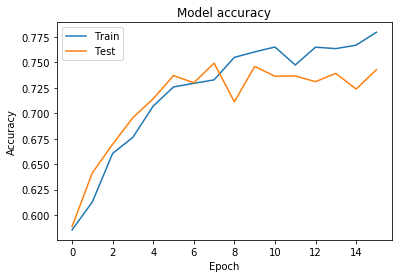

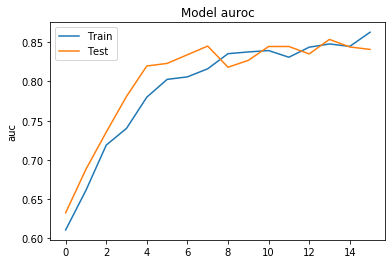

In [0]:
def modelplots():
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

    # Plot training & validation loss values

    plt.plot(history.history['auroc'])
    plt.plot(history.history['val_auroc'])
    plt.title('Model auroc')
    plt.ylabel('auc')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()
modelplots()

## model 1b

Same as above model but increased steps per epoch and decreased epochs

In [0]:
model1=model_11()
#model.load_weights('1_model_weights.h5')
file_path='my_model_12.hdf5'
log_dir='model12'
tensorboard_callback = TensorBoard(log_dir=log_dir)
reduce_on_plateau = ReduceLROnPlateau(monitor="val_acc", mode="max", factor=0.1, patience=20, verbose=1)
checkpoint=ModelCheckpoint(file_path,monitor='val_acc',verbose=1,save_best_only=True,mode='max') #Saves the best model based on val_acc
callbacks_list=[reduce_on_plateau,checkpoint,tensorboard_callback]


Model: "model_7"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_19 (InputLayer)           (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
input_20 (InputLayer)           (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
vggface_resnet50 (Model)        multiple             23561152    input_19[0][0]                   
                                                                 input_20[0][0]                   
__________________________________________________________________________________________________
dropout_25 (Dropout)            (None, 1, 1, 2048)   0           vggface_resnet50[1][0]     

In [0]:

history=model1.fit_generator(datagenerator(frame1,frame,batch_size=24),\
                    use_multiprocessing=True,\
                    validation_data=datagenerator(frame1_val, frame_val, batch_size=14),\
                    epochs=6,verbose=1,workers=4,callbacks=callbacks_list,steps_per_epoch=500,validation_steps=100)

/usr/local/lib/python3.6/dist-packages/keras/engine/training_generator.py:49: UserWarning: Using a generator with `use_multiprocessing=True` and multiple workers may duplicate your data. Please consider using the `keras.utils.Sequence class.
  UserWarning('Using a generator with `use_multiprocessing=True`'


Epoch 1/6
500/500 [==============================] - 350s 699ms/step - loss: 0.7409 - acc: 0.6155 - auroc: 0.6598 - val_loss: 0.5681 - val_acc: 0.7186 - val_auroc: 0.7976

Epoch 00001: val_acc improved from -inf to 0.71857, saving model to my_model_12.hdf5
Epoch 2/6
500/500 [==============================] - 314s 627ms/step - loss: 0.5885 - acc: 0.7164 - auroc: 0.7894 - val_loss: 0.5773 - val_acc: 0.7171 - val_auroc: 0.8355

Epoch 00002: val_acc did not improve from 0.71857
Epoch 3/6
500/500 [==============================] - 313s 627ms/step - loss: 0.5363 - acc: 0.7488 - auroc: 0.8301 - val_loss: 0.5676 - val_acc: 0.7400 - val_auroc: 0.8489

Epoch 00003: val_acc improved from 0.71857 to 0.74004, saving model to my_model_12.hdf5
Epoch 4/6
500/500 [==============================] - 315s 630ms/step - loss: 0.4795 - acc: 0.7822 - auroc: 0.8644 - val_loss: 0.5641 - val_acc: 0.7289 - val_auroc: 0.8447

Epoch 00004: val_acc did not improve from 0.74004
Epoch 5/6
500/500 [====================

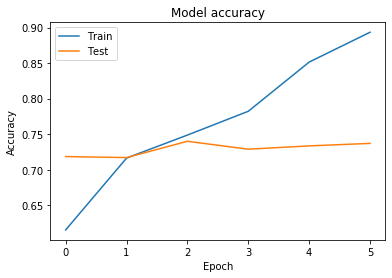

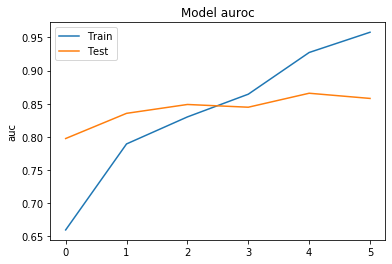

In [0]:
modelplots()

## Model 1c

In [0]:
from keras.layers.normalization import BatchNormalization
def model_1():
  input1=Input(shape=(224,224,3))
  input2=Input(shape=(224,224,3))
  

  base_model=VGGFace(model='resnet50',include_top=False)  # Pretrained model  Vggface
  for x in base_model.layers[:-3]:
      x.trainable = True

  x1=base_model(input1)
  x2=base_model(input2)
  x1=Dropout(0.2)(x1)
  x2=Dropout(0.2)(x2)
  x1=Concatenate(axis=-1)([GlobalMaxPool2D()(x1),GlobalAvgPool2D()(x1)])
  x2=Concatenate(axis=-1)([GlobalMaxPool2D()(x2),GlobalAvgPool2D()(x2)])

  x3=Subtract()([x1,x2])
  x3=Multiply()([x3,x3])

  x1_=Multiply()([x1,x1])
  x2_=Multiply()([x2,x2])
  x4=Subtract()([x1_,x2_])

  x5=Multiply()([x1,x2])

  x=Concatenate(axis=-1)([x3,x4,x5])

  x=(BatchNormalization())(x)
  
  x=Dropout(0.01)(x)
 
  x=Dense(100,activation='relu')(x)
  x=Dropout(0.2)(x)
  out=Dense(1,activation='sigmoid')(x)

  model=Model([input1,input2],out)

  model.compile(loss='binary_crossentropy',metrics=['acc',auroc],optimizer=Adam(0.00001))

  model.summary()

  return model


In [0]:
import warnings
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
model1=model_1()
#model.load_weights('1_model_weights.h5')
file_path='my_model_1.hdf5'
reduce_on_plateau = ReduceLROnPlateau(monitor="val_acc", mode="max", factor=0.1, patience=20, verbose=1)
checkpoint=ModelCheckpoint(file_path,monitor='val_acc',verbose=1,save_best_only=True,mode='max') #Saves the best model based on val_acc
callbacks_list=[reduce_on_plateau,checkpoint]


Model: "model_7"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_19 (InputLayer)           (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
input_20 (InputLayer)           (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
vggface_resnet50 (Model)        multiple             23561152    input_19[0][0]                   
                                                                 input_20[0][0]                   
__________________________________________________________________________________________________
dropout_23 (Dropout)            (None, 1, 1, 2048)   0           vggface_resnet50[1][0]     

In [0]:
#fitting
batch_size=24
history=model1.fit_generator(datagenerator(frame1,frame,batch_size=14),\
                    use_multiprocessing=True,\
                    validation_data=datagenerator(frame1_val, frame_val, batch_size=14),\
                    epochs=20,verbose=1,workers=4,callbacks=callbacks_list,steps_per_epoch=200,validation_steps=100)

Epoch 1/20


/usr/local/lib/python3.6/dist-packages/keras/engine/training_generator.py:49: UserWarning: Using a generator with `use_multiprocessing=True` and multiple workers may duplicate your data. Please consider using the `keras.utils.Sequence class.
  UserWarning('Using a generator with `use_multiprocessing=True`'


200/200 [==============================] - 148s 738ms/step - loss: 0.7938 - acc: 0.5882 - auroc: 0.6310 - val_loss: 0.7929 - val_acc: 0.5843 - val_auroc: 0.6163

Epoch 00001: val_acc improved from -inf to 0.58429, saving model to my_model_1.hdf5
Epoch 2/20
200/200 [==============================] - 94s 470ms/step - loss: 0.7493 - acc: 0.6018 - auroc: 0.6531 - val_loss: 0.7137 - val_acc: 0.5971 - val_auroc: 0.6294

Epoch 00002: val_acc improved from 0.58429 to 0.59714, saving model to my_model_1.hdf5
Epoch 3/20
200/200 [==============================] - 93s 467ms/step - loss: 0.7044 - acc: 0.6352 - auroc: 0.6893 - val_loss: 0.6963 - val_acc: 0.6051 - val_auroc: 0.6937

Epoch 00003: val_acc improved from 0.59714 to 0.60509, saving model to my_model_1.hdf5
Epoch 4/20
200/200 [==============================] - 94s 468ms/step - loss: 0.6357 - acc: 0.6807 - auroc: 0.7430 - val_loss: 0.6024 - val_acc: 0.6707 - val_auroc: 0.7572

Epoch 00004: val_acc improved from 0.60509 to 0.67071, saving mo

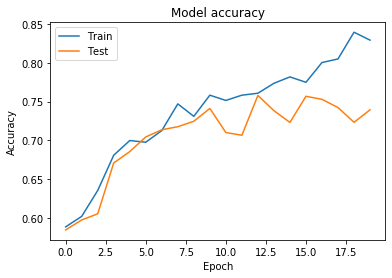

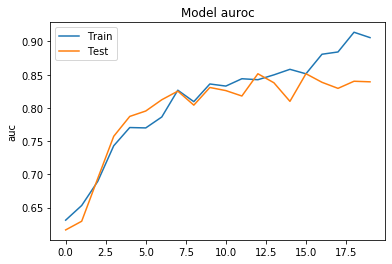

In [0]:
# Plot training & validation accuracy values

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values

plt.plot(history.history['auroc'])
plt.plot(history.history['val_auroc'])
plt.title('Model auroc')
plt.ylabel('auc')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Model 2

In [0]:
#https://stackoverflow.com/a/51003359/10650182
from keras import backend as K
def cosine_distance(vests):
    x, y = vests
    x = K.l2_normalize(x, axis=-1)
    y = K.l2_normalize(y, axis=-1)
    return -K.mean(x * y, axis=-1, keepdims=True)

def cos_dist_output_shape(shapes):
    shape1, shape2 = shapes
    return (shape1[0],1)

In [0]:
def model_2():
    #change 2
    input_1 = Input(shape=(224, 224, 3))
    input_2 = Input(shape=(224, 224, 3))

    base_model = VGGFace(model='resnet50', include_top=False)

    for x in base_model.layers[:-3]:
        x.trainable = True

    x1 = base_model(input_1)
    x2 = base_model(input_2)
    x1=Dropout(0.2)(x1)
    x2=Dropout(0.2)(x2)

    x1 = GlobalMaxPool2D()(x1)
    x2 = GlobalMaxPool2D()(x2)

    x3 = Subtract()([x1, x2])
    x4 = Multiply()([x1, x2])
    
    x5 = Lambda(cosine_distance, output_shape=cos_dist_output_shape)([x1, x2])
   
    
    x = Concatenate(axis=-1)([x5, x3,x4])
    x = Dropout(0.1)(x)

    out = Dense(1, activation="sigmoid")(x)

    model = Model([input_1, input_2], out)

    model.compile(loss=['binary_crossentropy'], metrics=['acc',auroc], optimizer=Adam(0.00001))

    model.summary()

    return model

In [0]:

from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
model2=model_2()
#model.load_weights('1_model_weights.h5')
log_dir='model2'
tensorboard_callback = TensorBoard(log_dir=log_dir)
file_path='my_model_2.hdf5'
reduce_on_plateau = ReduceLROnPlateau(monitor="val_acc", mode="max", factor=0.1, patience=20, verbose=1)
checkpoint=ModelCheckpoint(file_path,monitor='val_acc',verbose=1,save_best_only=True,mode='max') #Saves the best model based on val_acc
callbacks_list=[checkpoint,reduce_on_plateau,tensorboard_callback ]














94699520/94694792 [==============================] - 3s 0us/step
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Instructions for updating:
tf.py_func is deprecated in TF V2. Instead, there are two
    options available in V2.
    - tf.py_function takes a python function which manipulates tf eager
    tensors instead of numpy arrays. It's easy to convert a tf eager tensor to
    an ndarray (just call tensor.numpy()) but having access to eager tensors
    means `tf.py_function`s can use accelerators such as GPUs as well as
    being differentiable using a gradient tape.
    - tf.numpy_function maintains the semantics of the deprecated tf.py_func
    (it is not differentiable, and manipulates numpy arrays). It drops the
    stateful argument making all functions stateful.
    
Model: "model_1"
_____________________

In [0]:
history=model2.fit_generator(datagenerator(frame1,frame,batch_size=14),\
                    validation_data=datagenerator(frame1_val, frame_val, batch_size=14),\
                    epochs=16,verbose=1,callbacks=callbacks_list,steps_per_epoch=200,validation_steps=100)





Epoch 1/16
200/200 [==============================] - 110s 550ms/step - loss: 2.0465 - acc: 0.5321 - auroc: 0.5403 - val_loss: 1.3593 - val_acc: 0.5626 - val_auroc: 0.5927

Epoch 00001: val_acc improved from -inf to 0.56263, saving model to my_model_2.hdf5

Epoch 2/16
200/200 [==============================] - 88s 441ms/step - loss: 1.2050 - acc: 0.5514 - auroc: 0.5802 - val_loss: 1.3942 - val_acc: 0.5547 - val_auroc: 0.5948

Epoch 00002: val_acc did not improve from 0.56263
Epoch 3/16
200/200 [==============================] - 89s 443ms/step - loss: 0.8813 - acc: 0.5841 - auroc: 0.6189 - val_loss: 0.8316 - val_acc: 0.6027 - val_auroc: 0.6509

Epoch 00003: val_acc improved from 0.56263 to 0.60269, saving model to my_model_2.hdf5
Epoch 4/16
200/200 [==============================] - 89s 447ms/step - loss: 0.7355 - acc: 0.6189 - auroc: 0.6632 - val_loss: 0.6754 - val_acc: 0.6192 - val_auroc: 0.6894

Epoch 00004: val_acc improved from 0.60269 to 0.61915, saving model to my_model_2.hdf

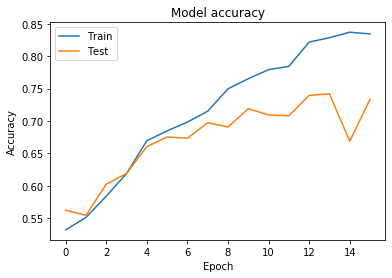

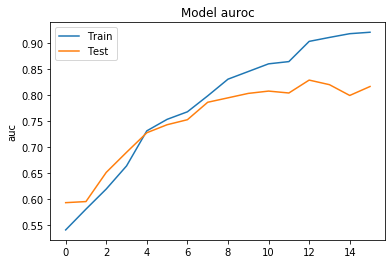

In [0]:

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values

plt.plot(history.history['auroc'])
plt.plot(history.history['val_auroc'])
plt.title('Model auroc')
plt.ylabel('auc')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Model 3

In [0]:
from keras.layers.normalization import BatchNormalization
def model_3():
  input1=Input(shape=(224,224,3))
  input2=Input(shape=(224,224,3))
  

  base_model=VGGFace(model='senet50',include_top=False)  # Pretrained model  Vggface
  for x in base_model.layers[:-3]:
      x.trainable = True

  x1=base_model(input1)
  x2=base_model(input2)
  x1=Dropout(0.2)(x1)
  x2=Dropout(0.2)(x2)
  x1=Concatenate(axis=-1)([GlobalMaxPool2D()(x1),GlobalAvgPool2D()(x1)])
  x2=Concatenate(axis=-1)([GlobalMaxPool2D()(x2),GlobalAvgPool2D()(x2)])

  x3=Subtract()([x1,x2])
  x3=Multiply()([x3,x3])

  x1_=Multiply()([x1,x1])
  x2_=Multiply()([x2,x2])
  x4=Subtract()([x1_,x2_])

  x5=Multiply()([x1,x2])

  x=Concatenate(axis=-1)([x3,x4,x5])

  x=(BatchNormalization())(x)
  
  x=Dropout(0.2)(x)
 
  x=Dense(256,activation='relu')(x)
  x=(BatchNormalization())(x)
  x=Dropout(0.2)(x)
  out=Dense(1,activation='sigmoid')(x)

  model=Model([input1,input2],out)

  model.compile(loss='binary_crossentropy',metrics=['acc',auroc],optimizer=Adam(0.00001))

  model.summary()

  return model

In [119]:

model3=model_3()
#model.load_weights('1_model_weights.h5')
file_path='my_model_3.hdf5'
log_dir='model4'
tensorboard_callback = TensorBoard(log_dir=log_dir)
reduce_on_plateau = ReduceLROnPlateau(monitor="val_acc", mode="max", factor=0.1, patience=20, verbose=1)
checkpoint=ModelCheckpoint(file_path,monitor='val_acc',verbose=1,save_best_only=True,mode='max') #Saves the best model based on val_acc
callbacks_list=[checkpoint,reduce_on_plateau,tensorboard_callback]

Model: "model_19"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_64 (InputLayer)           (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
input_65 (InputLayer)           (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
vggface_senet50 (Model)         multiple             26092144    input_64[0][0]                   
                                                                 input_65[0][0]                   
__________________________________________________________________________________________________
dropout_46 (Dropout)            (None, 1, 1, 2048)   0           vggface_senet50[1][0]     

In [120]:
history=model3.fit_generator(datagenerator(frame1,frame,batch_size=14),\
                    validation_data=datagenerator(frame1_val, frame_val, batch_size=14),\
                    epochs=11,verbose=1,callbacks=callbacks_list,steps_per_epoch=200,validation_steps=100)

Epoch 1/11
200/200 [==============================] - 146s 729ms/step - loss: 0.7126 - acc: 0.6396 - auroc: 0.6905 - val_loss: 0.6854 - val_acc: 0.5990 - val_auroc: 0.6471

Epoch 00001: val_acc improved from -inf to 0.59899, saving model to my_model_3.hdf5
Epoch 2/11
200/200 [==============================] - 111s 556ms/step - loss: 0.5933 - acc: 0.7137 - auroc: 0.7805 - val_loss: 0.6213 - val_acc: 0.6818 - val_auroc: 0.7571

Epoch 00002: val_acc improved from 0.59899 to 0.68179, saving model to my_model_3.hdf5
Epoch 3/11
200/200 [==============================] - 111s 554ms/step - loss: 0.5369 - acc: 0.7427 - auroc: 0.8238 - val_loss: 0.6054 - val_acc: 0.6909 - val_auroc: 0.7705

Epoch 00003: val_acc improved from 0.68179 to 0.69086, saving model to my_model_3.hdf5
Epoch 4/11
200/200 [==============================] - 111s 554ms/step - loss: 0.4911 - acc: 0.7750 - auroc: 0.8553 - val_loss: 0.6287 - val_acc: 0.6901 - val_auroc: 0.7704

Epoch 00004: val_acc did not improve from 0.69086


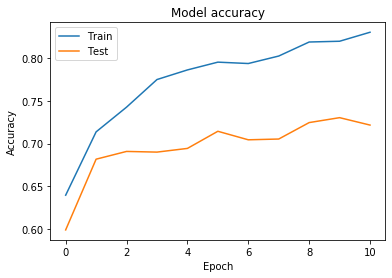

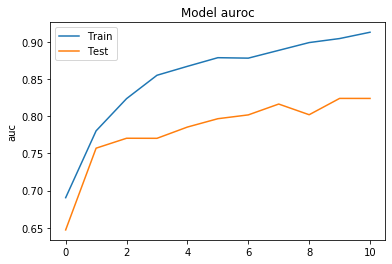

In [121]:

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values

plt.plot(history.history['auroc'])
plt.plot(history.history['val_auroc'])
plt.title('Model auroc')
plt.ylabel('auc')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Observation.

By VGG senet50 with same architecture is trying to overfit a bit .

# Model 4

## Using image augmentation

In [0]:
from keras.layers.normalization import BatchNormalization
def model_4():
  input1=Input(shape=(224,224,3))
  input2=Input(shape=(224,224,3))
  

  base_model=VGGFace(model='resnet50',include_top=False)  # Pretrained model  Vggface
  for x in base_model.layers[:-3]:
      x.trainable = True

  x1=base_model(input1)
  x2=base_model(input2)
  x1=Dropout(0.2)(x1)
  x2=Dropout(0.2)(x2)
  x1=Concatenate(axis=-1)([GlobalMaxPool2D()(x1),GlobalAvgPool2D()(x1)])
  x2=Concatenate(axis=-1)([GlobalMaxPool2D()(x2),GlobalAvgPool2D()(x2)])

  x3=Subtract()([x1,x2])
  x3=Multiply()([x3,x3])

  x1_=Multiply()([x1,x1])
  x2_=Multiply()([x2,x2])
  x4=Subtract()([x1_,x2_])

  x5=Multiply()([x1,x2])

  x=Concatenate(axis=-1)([x3,x4,x5])

  x=(BatchNormalization())(x)
  
  x=Dropout(0.2)(x)
 
  x=Dense(256,activation='relu')(x)
  x=(BatchNormalization())(x)
  x=Dropout(0.2)(x)
  out=Dense(1,activation='sigmoid')(x)

  model=Model([input1,input2],out)

  model.compile(loss='binary_crossentropy',metrics=['acc'],optimizer=Adam(0.00001))

  model.summary()

  return model

In [140]:

model4=model_4()
#model.load_weights('1_model_weights.h5')
file_path='my_model_4.hdf5'
log_dir='model5'
tensorboard_callback = TensorBoard(log_dir=log_dir)
reduce_on_plateau = ReduceLROnPlateau(monitor="val_acc", mode="max", factor=0.1, patience=20, verbose=1)
checkpoint=ModelCheckpoint(file_path,monitor='val_acc',verbose=1,save_best_only=True,mode='max') #Saves the best model based on val_acc
callbacks_list=[checkpoint,reduce_on_plateau,tensorboard_callback]

Model: "model_21"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_76 (InputLayer)           (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
input_77 (InputLayer)           (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
vggface_resnet50 (Model)        multiple             23561152    input_76[0][0]                   
                                                                 input_77[0][0]                   
__________________________________________________________________________________________________
dropout_54 (Dropout)            (None, 1, 1, 2048)   0           vggface_resnet50[1][0]    

In [143]:
history=model4.fit_generator(get_flow_from_dataframe(train_generator_1,train_generator_2),\
                    validation_data=get_flow_from_dataframe(train_generator_3,train_generator_4),\
                    epochs=16,verbose=1,callbacks=callbacks_list,steps_per_epoch=200,validation_steps=100)

Epoch 1/16
200/200 [==============================] - 152s 759ms/step - loss: 0.8116 - acc: 0.5683 - val_loss: 0.8621 - val_acc: 0.4895

Epoch 00001: val_acc did not improve from 0.48991
Epoch 2/16
200/200 [==============================] - 147s 736ms/step - loss: 0.8146 - acc: 0.5617 - val_loss: 0.8822 - val_acc: 0.4769

Epoch 00002: val_acc did not improve from 0.48991
Epoch 3/16
200/200 [==============================] - 146s 732ms/step - loss: 0.8007 - acc: 0.5785 - val_loss: 0.8392 - val_acc: 0.5004

Epoch 00003: val_acc improved from 0.48991 to 0.50042, saving model to my_model_4.hdf5
Epoch 4/16
200/200 [==============================] - 145s 727ms/step - loss: 0.8058 - acc: 0.5802 - val_loss: 0.8573 - val_acc: 0.4936

Epoch 00004: val_acc did not improve from 0.50042
Epoch 5/16
200/200 [==============================] - 145s 725ms/step - loss: 0.7935 - acc: 0.5867 - val_loss: 0.8482 - val_acc: 0.4811

Epoch 00005: val_acc did not improve from 0.50042
Epoch 6/16
200/200 [========

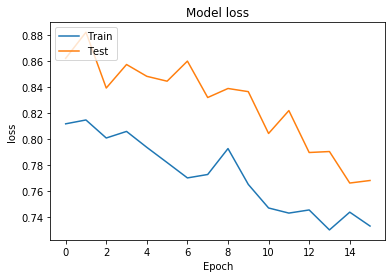

In [148]:

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()



# Main observation:

1.Model 1 performed well out of all models .

2.Pretrained model Vgg resnet50 and senet50 has significantly impacted our model's performance.


3.We can improve our results further to some extent but expecting close to 100 percent accuracy may not be possible due the fact that faces may not always retain their previous generation symptomes.


In [153]:
from prettytable import PrettyTable
conclusion= PrettyTable()
conclusion.field_names = [ "Model", 'best train auc'," best cv AUC"]

conclusion.add_row(["Model 1a", 0.86,0.85])
conclusion.add_row(["Model 1b", 0.95,0.86])
conclusion.add_row(["Model 1c", 0.91,0.85])
conclusion.add_row(["Model 2", 0.91, 0.82])
conclusion.add_row(["Model 3", 0.91, 0.82])

print(conclusion)

+----------+----------------+--------------+
|  Model   | best train auc |  best cv AUC |
+----------+----------------+--------------+
| Model 1a |      0.86      |     0.85     |
| Model 1b |      0.95      |     0.86     |
| Model 1c |      0.91      |     0.85     |
| Model 2  |      0.91      |     0.82     |
| Model 3  |      0.91      |     0.82     |
+----------+----------------+--------------+


#### submission

In [122]:
submission=pd.read_csv('recognizing-faces-in-the-wild/sample_submission.csv',header=0)
test_path='test/'

def test_batch(test_pairs,size=32):
  return (test_pairs[pos:pos+size] for pos in range(0,len(test_pairs),size))

predictions=[]
for batch in tqdm(test_batch(submission.img_pair.values)):
    X1 = [x.split("-")[0] for x in batch]
    X1 = np.array([img2arr(test_path + x) for x in X1])

    X2 = [x.split("-")[1] for x in batch]
    X2 = np.array([img2arr(test_path + x) for x in X2])

    pred = model3.predict([X1, X2]).ravel().tolist()
    predictions += pred

submission['is_related'] = predictions

166it [01:12,  3.43it/s]


In [0]:
submission.to_csv('df.csv',index=False)
submission

In [0]:
from google.colab import files

files.download('my_model_3.hdf5')